
 # **Evaluating Water Potability** 
 ### By Group 21 Section 002


Clean water is an essential ingredient for a healthy human life. However, at least 2 billion people use a contaminated drinking water source, and approximately 297,000 children less than five years old die globally due to the pathogens present in water  (United Nations, n.d.). Particularly, water quality in Nigeria has been affecting the health of children. The United Nations (UN) and World Health Organization (WHO) recognize that safe and readily available water and better management of water resources can contribute greatly to poverty reduction in third world countries.
Currently, 30 UN entities have successfully developed partnerships with 40 international organizations to accomplish this goal  (SDG 6 Global Acceleration Framework, n.d.). 

Dr. Doe has been the head of WHO since 2017 and he has had the chance to monitor the health of several children suffering from waterborne diseases in Nigeria. Recently, Dr. Doe, along with his team of health associates have started their journey to explore the causes of unsafe drinking water in Nigeria, where they aim to explore the following question: **How can the chemical composition of water help scientists predict water potability in Nigeria?**

To answer this question, we have retrieved a dataset from kaggle.com which is called Water Potability Dataset. It contains water quality metrics such as pH value, hardness, solids (total dissolved solids), chloramines, sulfate, conductivity, total organic carbon, trihalomethanes, turbidity, and potability, which we can use to evaluate and predict the water potability for 3, 276 different water bodies.

## Preliminary Analysis 

The Water Potability Dataset is a tidy dataset as it meets all three characteristics of tidy data – each row is a single observation, each column is a single variable and each value is a single cell. While evaluating the dataset, we saw that there are some NA values in the Sulfate column that we will filter out so that it doesn’t cause us problems in our data analysis. We will begin by loading our setting our seed value only once at the beginning of our code to ensure that there is no bias, human input in our data analysis later on. We will then split our dataset into a training and test set. 

### 1. Reading and Loading Data

In [29]:
# install required package
install.packages('corrplot')
install.packages('naniar')
install.packages("themis")

# import the libraries we need and set seed value 
library(tidyverse)
library(repr)
library(tidymodels)
library(corrplot)
library(grid)
library(naniar)
library(themis)
library(GGally)

#set seed value only once at the beginning
set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
options(repr.matrix.max.rows = 6)
# read dataset from the web (our github repository)
# dataset source: https://www.kaggle.com/adityakadiwal/water-potability
url <- 'https://raw.githubusercontent.com/ricardoliu99/dsci100-group21/main/water_potability.csv'

# download dataset file using download.file 
download.file(url, 'water_potability.csv')

water <- read_csv('water_potability.csv') %>% mutate(Potability = as.factor(Potability))
print("Table 1. Whole dataset")
water

Parsed with column specification:
cols(
  ph = col_double(),
  Hardness = col_double(),
  Solids = col_double(),
  Chloramines = col_double(),
  Sulfate = col_double(),
  Conductivity = col_double(),
  Organic_carbon = col_double(),
  Trihalomethanes = col_double(),
  Turbidity = col_double(),
  Potability = col_double()
)



[1] "Table 1. Whole dataset"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


### 2. Splitting the data into training and testing set 

We are choosing to use a considerable portion of our dataset (60%) for training to ensure that we train an accurate model. We choose to keep 40% of our dataset as testing data so that we can evaluate the accuracy and overall performance of our datset by testing on larger observations. Additionally, splitting the data into training and testing set will help us avoid overfitting our model since we would be evaluating our model using unseen observations.

In [30]:
# split data into 60% training data and 40% test data
water_split <- initial_split(water, prop = 0.60, strata = Potability)
water_train <- training(water_split)
water_test <- testing(water_split)
print("Table 2. Training data")
water_train
print("Table 3. Testing data")
water_test

[1] "Table 2. Training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.808856,193.5532,17329.80,8.061362,NA,392.4496,19.90323,NA,2.798243,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


[1] "Table 3. Testing data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
8.372910,169.0871,14622.75,7.547984,NA,464.5256,11.08303,38.43515,4.906358,1
6.069616,186.6590,26138.78,7.747547,345.7003,415.8870,12.06762,60.41992,3.669712,1
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1


### 3. Analyzing the dataset 

#### Summary tables

Part of conducting a good data analysis is figuring out the length, size, and metrics of our dataset. Here we count the number of rows per class, mean, max and min for each column, as well as the number of rows with at least one N/A. 

In [31]:
# count number of observations for each class in training data by grouping potability column
class_count <- water_train %>% 
    group_by(Potability) %>% 
    summarize(counts = n()) %>% 
    mutate(proportion = 100*counts/nrow(water_train))
print("Table 4. Count and proportion of training data")
class_count

# calculate mean of each predictor variable

predictor_means <- water_train %>%
    select(-Potability) %>% 
    map_df(mean, na.rm = TRUE)
print("Table 5. Columns means of training data")
predictor_means

# calculate max of each predictor variable
predictor_max <- water_train %>%
    select(-Potability) %>% 
    map_df(max, na.rm = TRUE)
print("Table 6. Columns maxima of training data")
predictor_max

# calculate min of each predictor variable
predictor_min <- water_train %>%
    select(-Potability) %>% 
    map_df(min, na.rm = TRUE)
print("Table 7. Columns minima of training data")
predictor_min

# count number of observation with at least one missing value (NA)
missing_rows <- water_train %>%
    filter(is.na(ph) | is.na(Hardness) | is.na(Solids) | is.na(Chloramines) | 
           is.na(Sulfate) | is.na(Conductivity) | is.na(Organic_carbon) | 
           is.na(Trihalomethanes) | is.na(Turbidity)) %>% 
    nrow()

str_c('There are ', missing_rows, ' missing rows in the dataset.')

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table 4. Count and proportion of training data"


Potability,counts,proportion
<fct>,<int>,<dbl>
0,1199,60.98678
1,767,39.01322


[1] "Table 5. Columns means of training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.08322,196.8623,22173.83,7.102138,334.0765,428.6891,14.31388,66.62283,3.965576


[1] "Table 6. Columns maxima of training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,323.124,61227.2,13.127,476.5397,708.2264,28.3,120.0301,6.739


[1] "Table 7. Columns minima of training data"


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,81.7109,320.9426,0.352,129,181.4838,2.2,0.738,1.45


[1] "There are 793 missing rows in the dataset."

From Table 4, we can observe that our training data consists of 60.99% class label 0 (not potable) and 39.01% class label 1 (potable). This indicates that class label 0 would be more likely to be the majority vote some values of $k$ and we should perform upsampling when building our model to deal with this class imbalance.  

Tables 5, 6 and 7 shows us some statistics about the different variables that can be used for predicting Potability. These statistics show us that not all columns have similar means and that the ranges of values vary greatly. For instance, some variables such as ph only have values between 0-14, whereas other variables such as solids have values between 300s and 22000s. This might cause some problems when building our KNN model since some variables might have more influence on the Euclidean distance.

#### Visualizing our results 

In the previous section, we found that 793 rows of our training data contain at least one N/A values. The following plot shows the distribution of the missing rows.

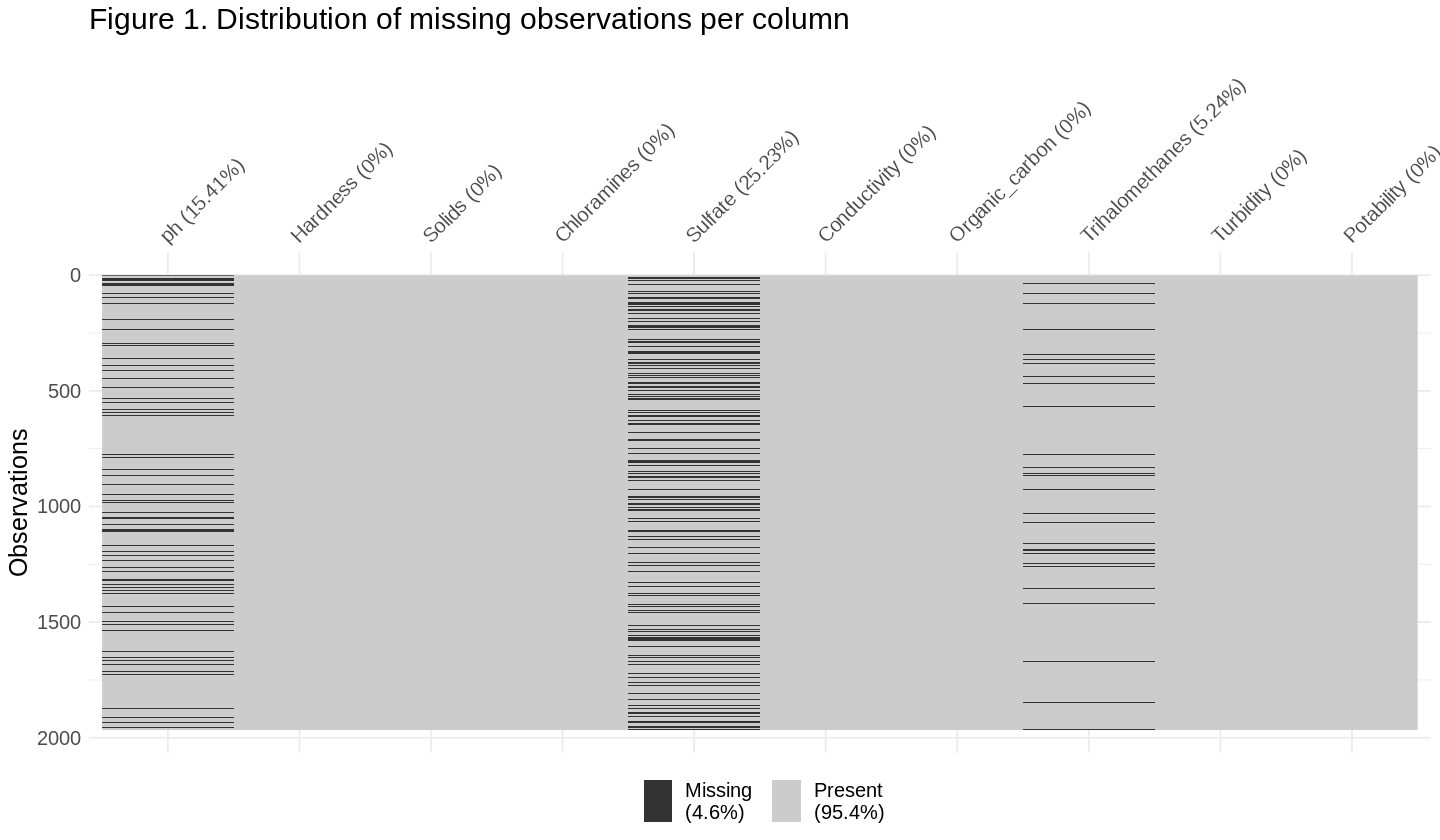

In [32]:
options(repr.plot.width=12, repr.plot.height=7)

# plot the distribution of missing rows for each column
vis_miss(water_train) +
theme(text = element_text(size=15)) +
ggtitle("Figure 1. Distribution of missing observations per column")

Figure 1 shows us that the variables ph, Sulfate and Trihalomethanes contain most of our missing data. One option we could choose is to just not include these three columns in our analysis altogether. However, these three variables are important properties to determine the potability of water. Consequently, we decide to filter rows and not columns for our anaylsis, and let forward selection choose the most relevant variables for us.

### 4. Evaluating frequency and distribution of our predictors

Now, we will use histograms and box plots to determine the frequency as well as distribution of each variable in our dataset with respect to our target variable (Potability).

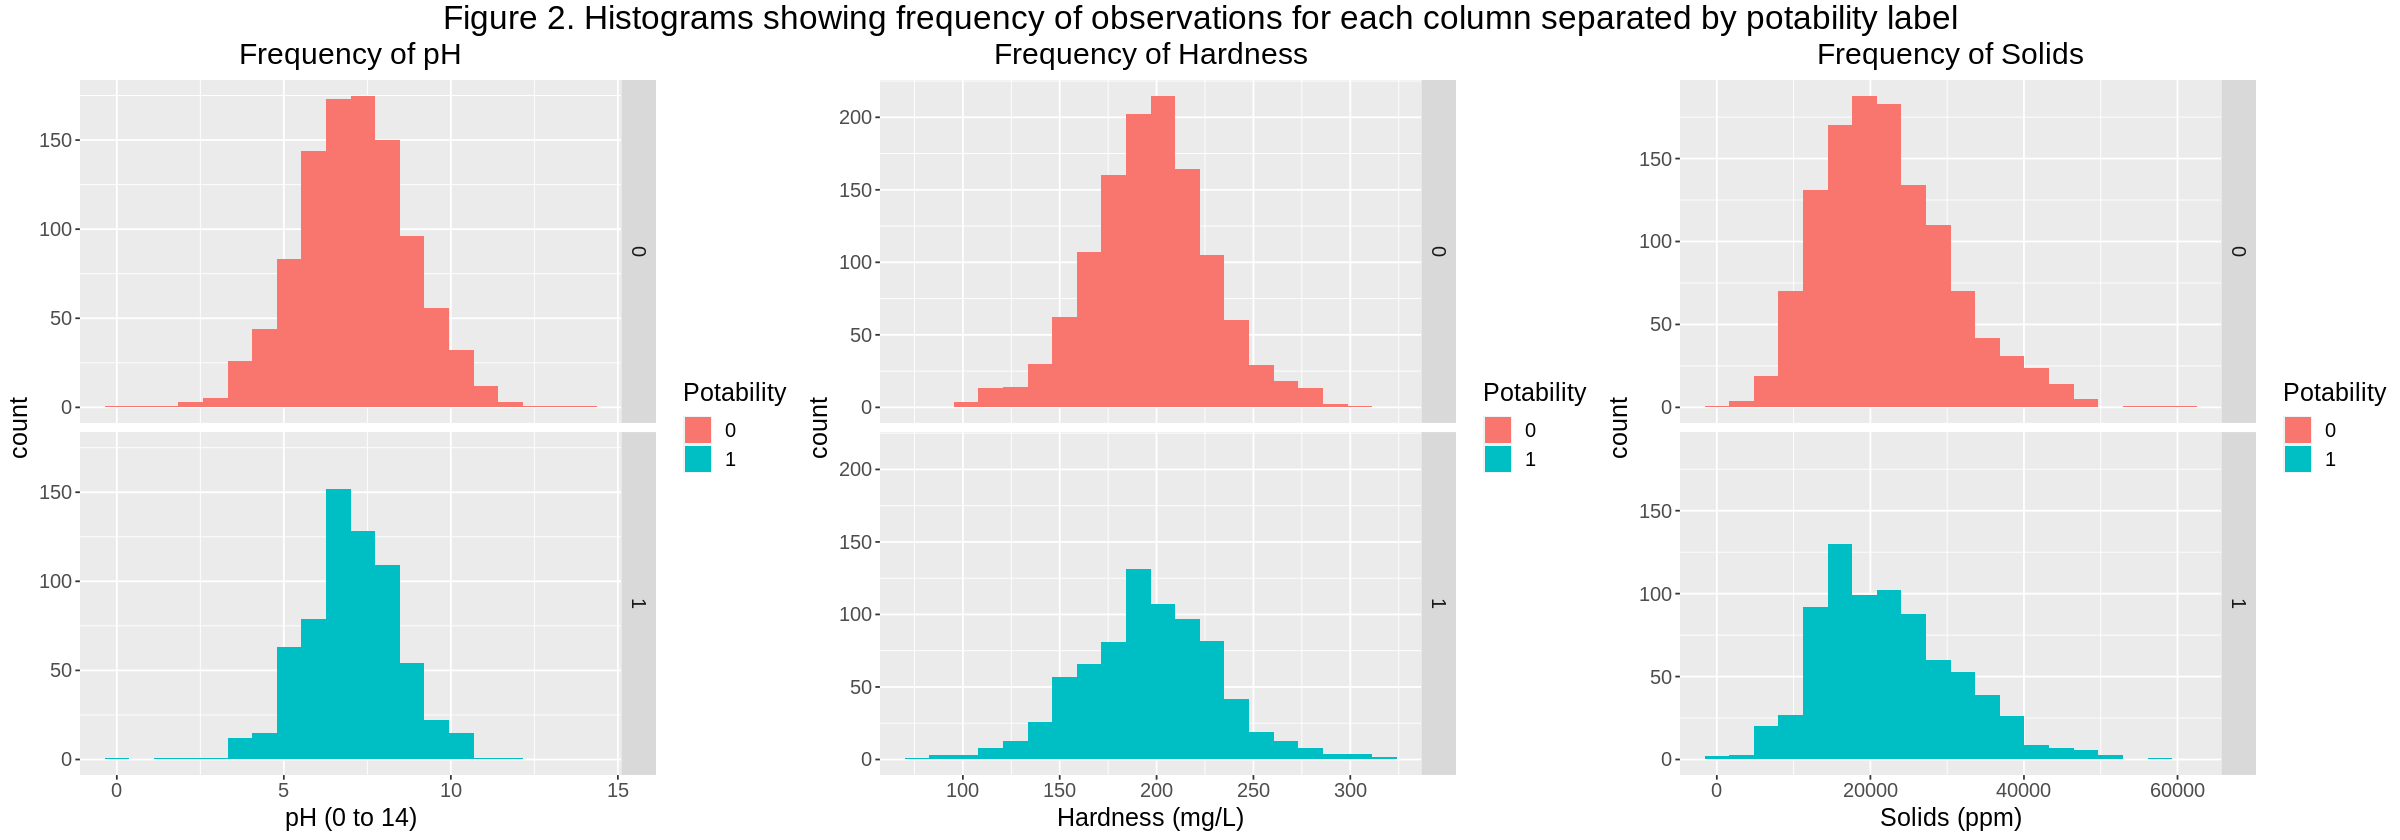

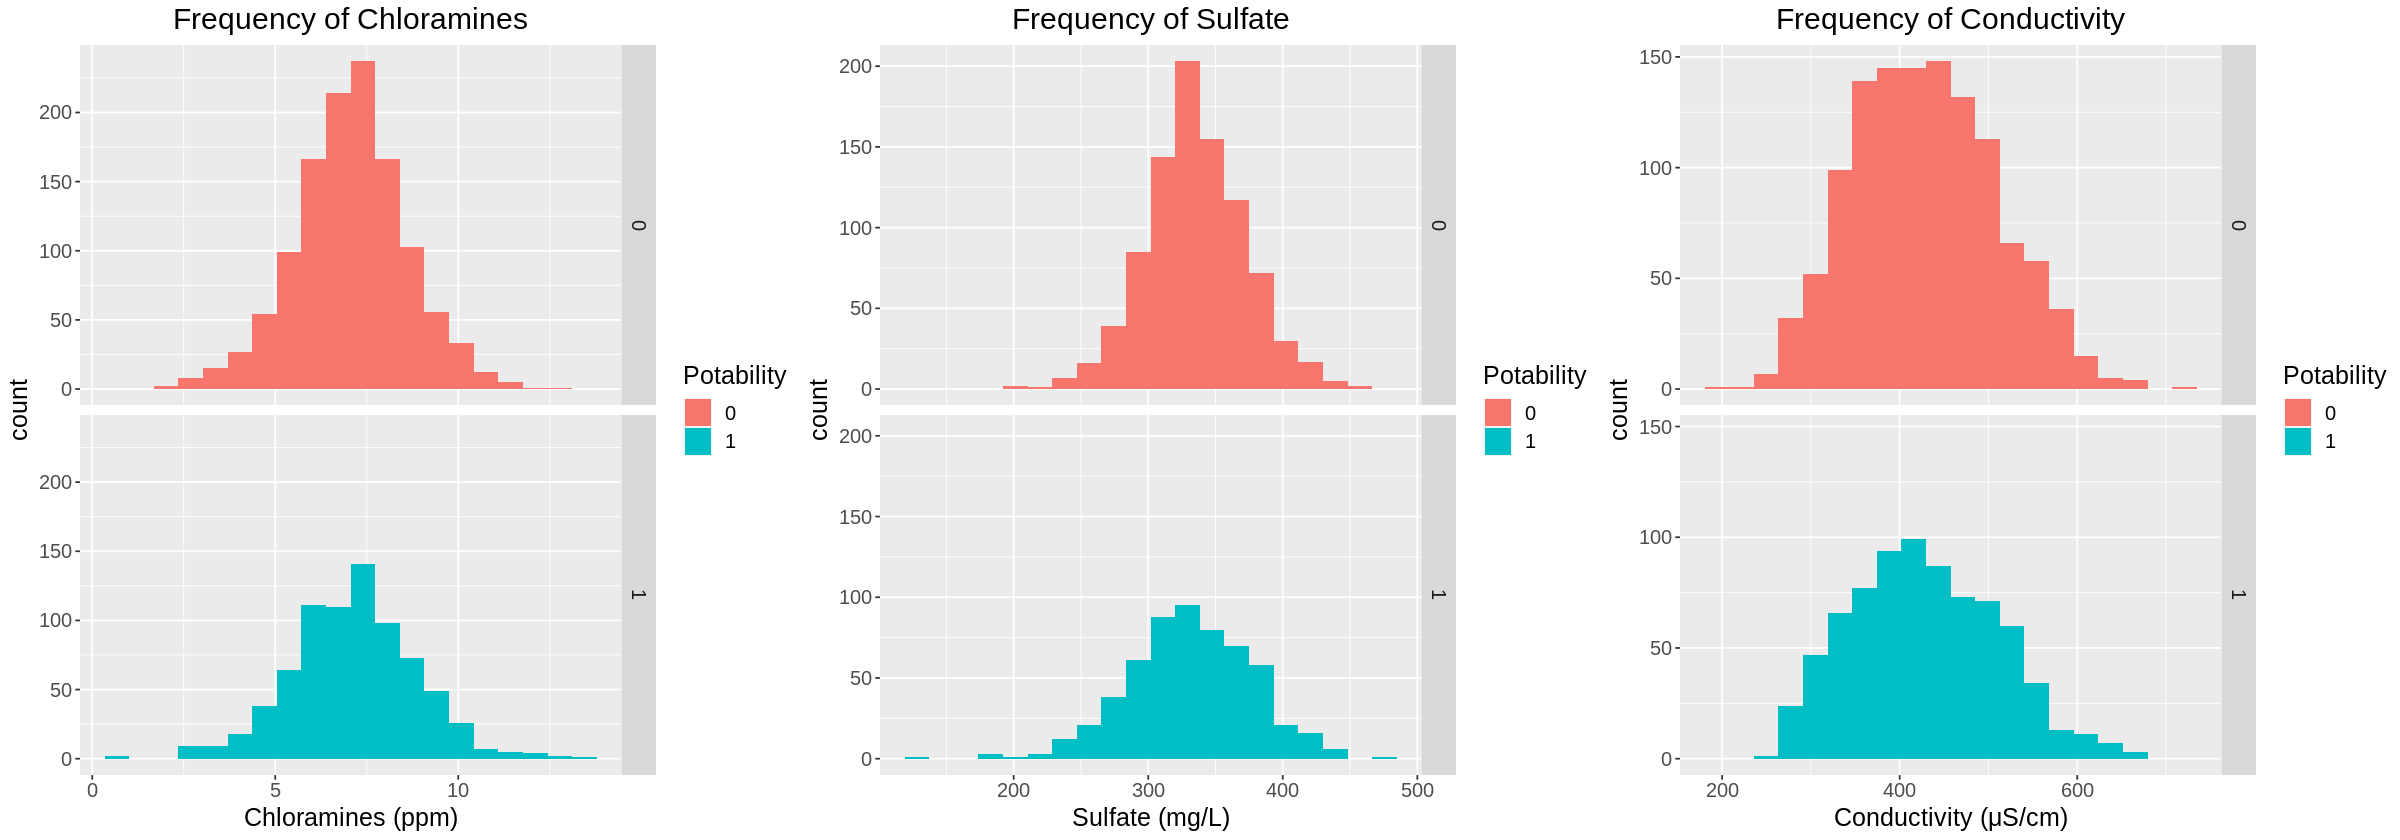

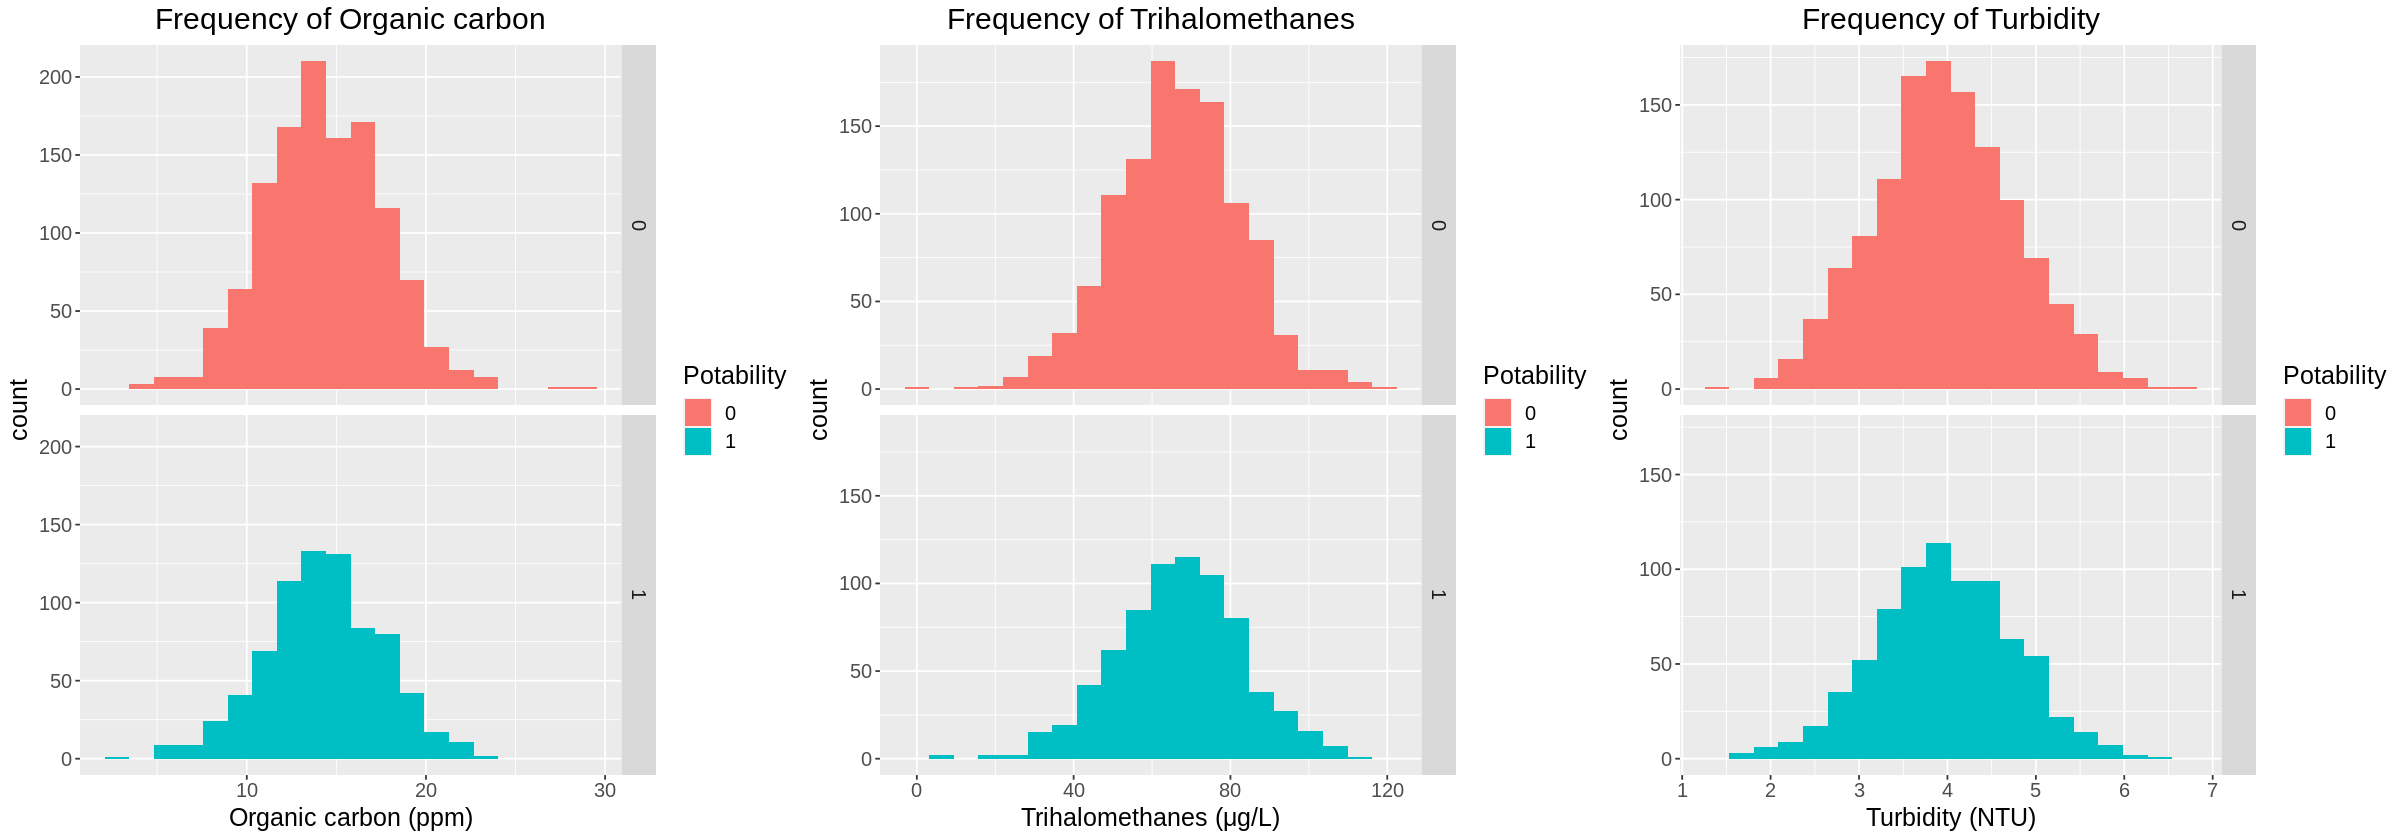

In [67]:
options(repr.plot.width=20, repr.plot.height=7)
# suppress warning messages to avoid cluttering
options(warn=-1)

water_cols <- names(water)
cols_units <- c("pH (0 to 14)", "Hardness (mg/L)", "Solids (ppm)", "Chloramines (ppm)",
               "Sulfate (mg/L)", "Conductivity (μS/cm)", "Organic carbon (ppm)",
               "Trihalomethanes (μg/L)", "Turbidity (NTU)")
histogram_titles <- c("Frequency of pH", "Frequency of Hardness", "Frequency of Solids", "Frequency of Chloramines",
                     "Frequency of Sulfate", "Frequency of Conductivity", "Frequency of Organic carbon",
                     "Frequency of Trihalomethanes", "Frequency of Turbidity")

# function used to create a histogram for given predictor, colored and separated by potability,
# with proper axes and title labels using ggplot
create_histogram = function(data_train, cols, units, titles, index) {
    histogram_plt <- ggplot(data_train, aes_string(x = cols[index])) +
        geom_histogram(aes(fill = Potability), bins=20) +
        labs(x=units[index]) + 
        ggtitle(titles[index]) +
        theme(plot.title = element_text(hjust = 0.5), text = element_text(size=15)) +
        facet_grid(rows=vars(Potability))
    return(histogram_plt)
}

# arrange the 9 histograms in 3x3 format using grid.arrange
for (col in seq(1,9,by=3)) { 
    histogram_plt1 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col)
    histogram_plt2 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+1)
    histogram_plt3 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+2)
    if (col == 1) {
        grid.arrange(histogram_plt1, histogram_plt2, histogram_plt3, ncol=3,
                     top=textGrob("Figure 2. Histograms showing frequency of observations for each column separated by potability label",gp=gpar(fontsize=20)) )
    } else {
        grid.arrange(histogram_plt1, histogram_plt2, histogram_plt3, ncol=3)
    }
}

# enable warnings back
options(warn=0)

From Figure 2, we can visualize the frequency of observations for each column separated by Potability. These histograms shows us that there are more values that are classified as class label 0, which shows the class imbalance we also found in Table 4. Another interesting observation is that for each variable, the center and peak of the histograms for class label 0 and 1 are very close. For instance, for column ph, both histograms for class label 0 and 1 are centered around 7. This indicates that the distribution of observations for each column is very similar regardless of whether they belong to class label 0 or 1. 

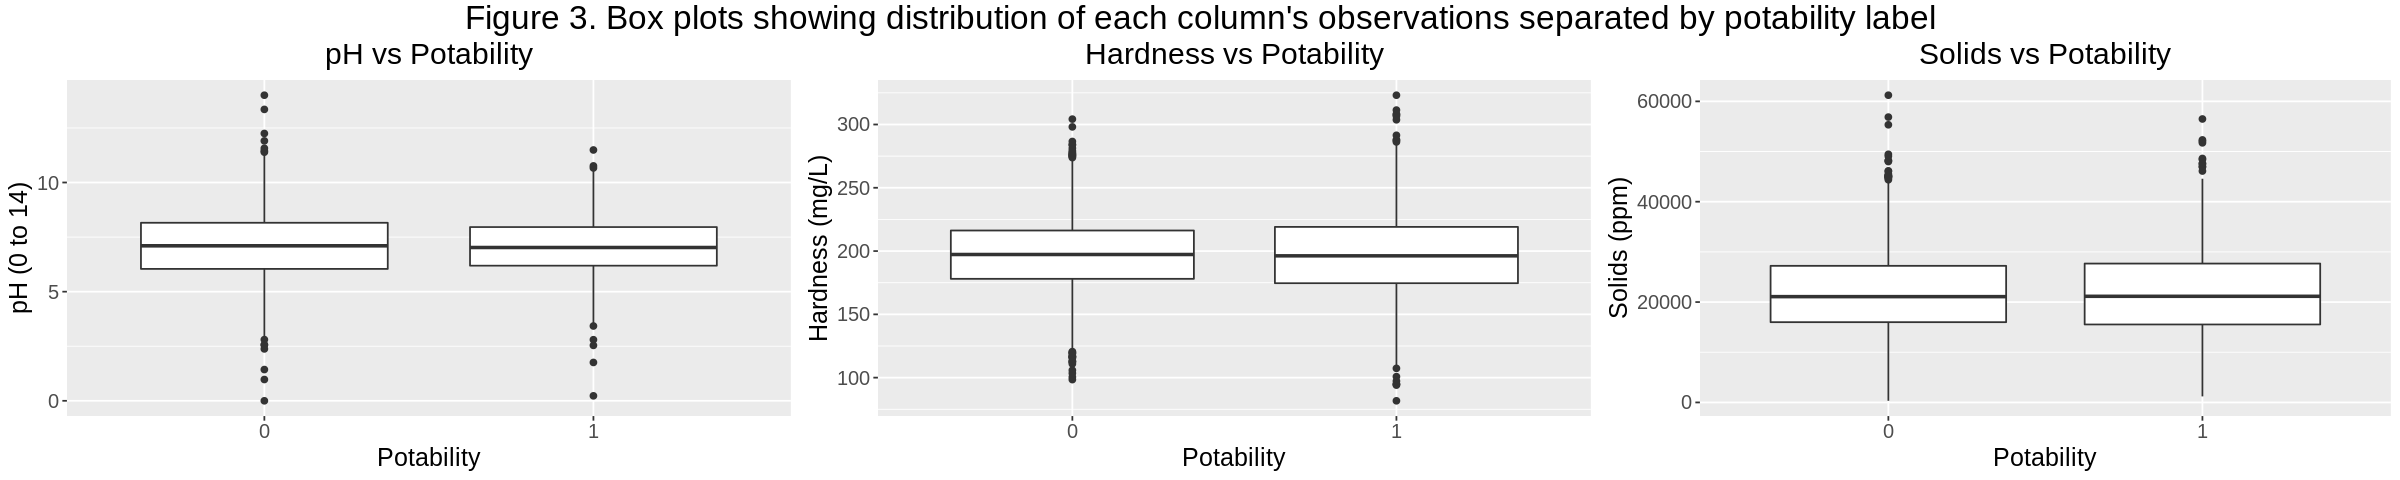

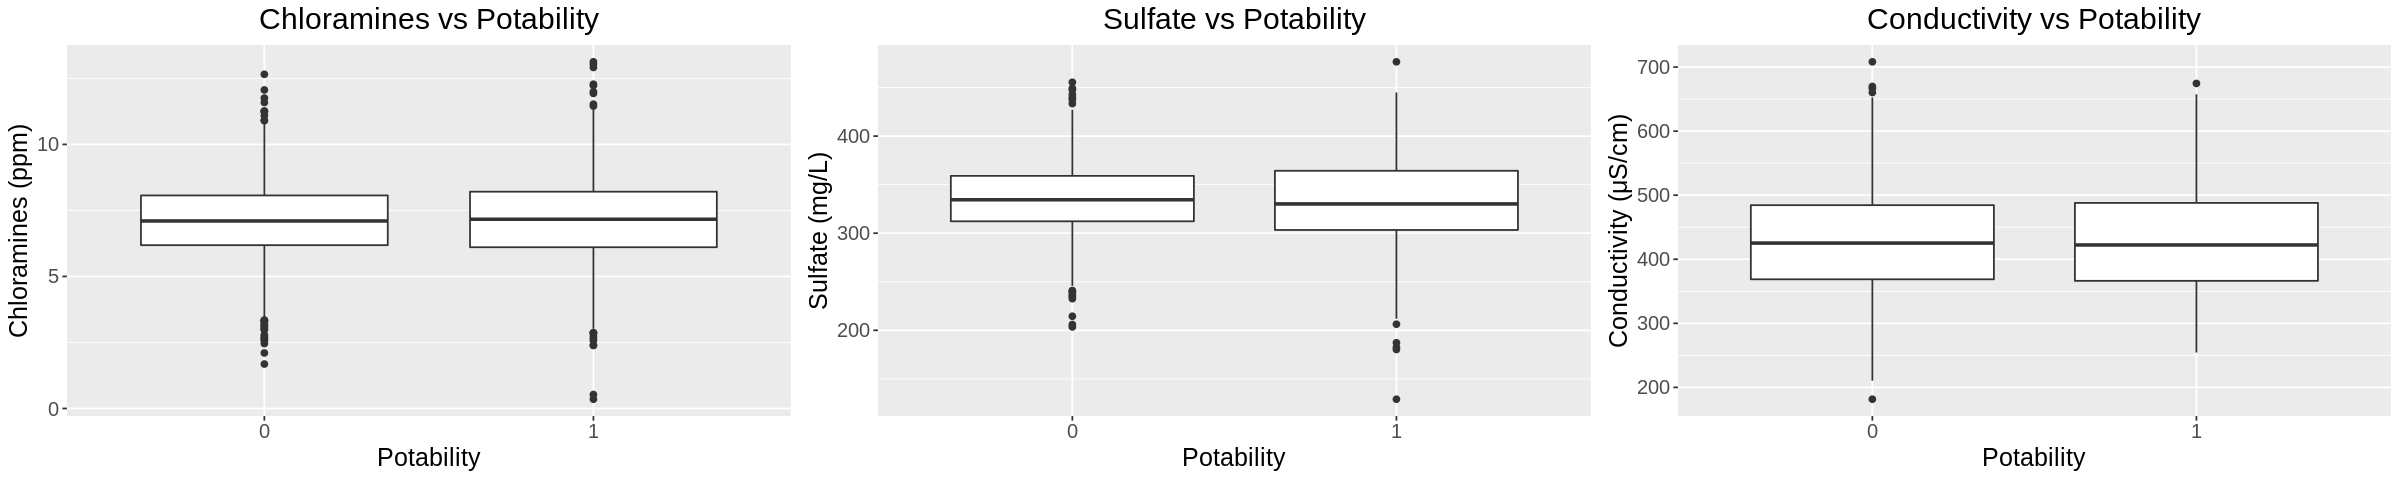

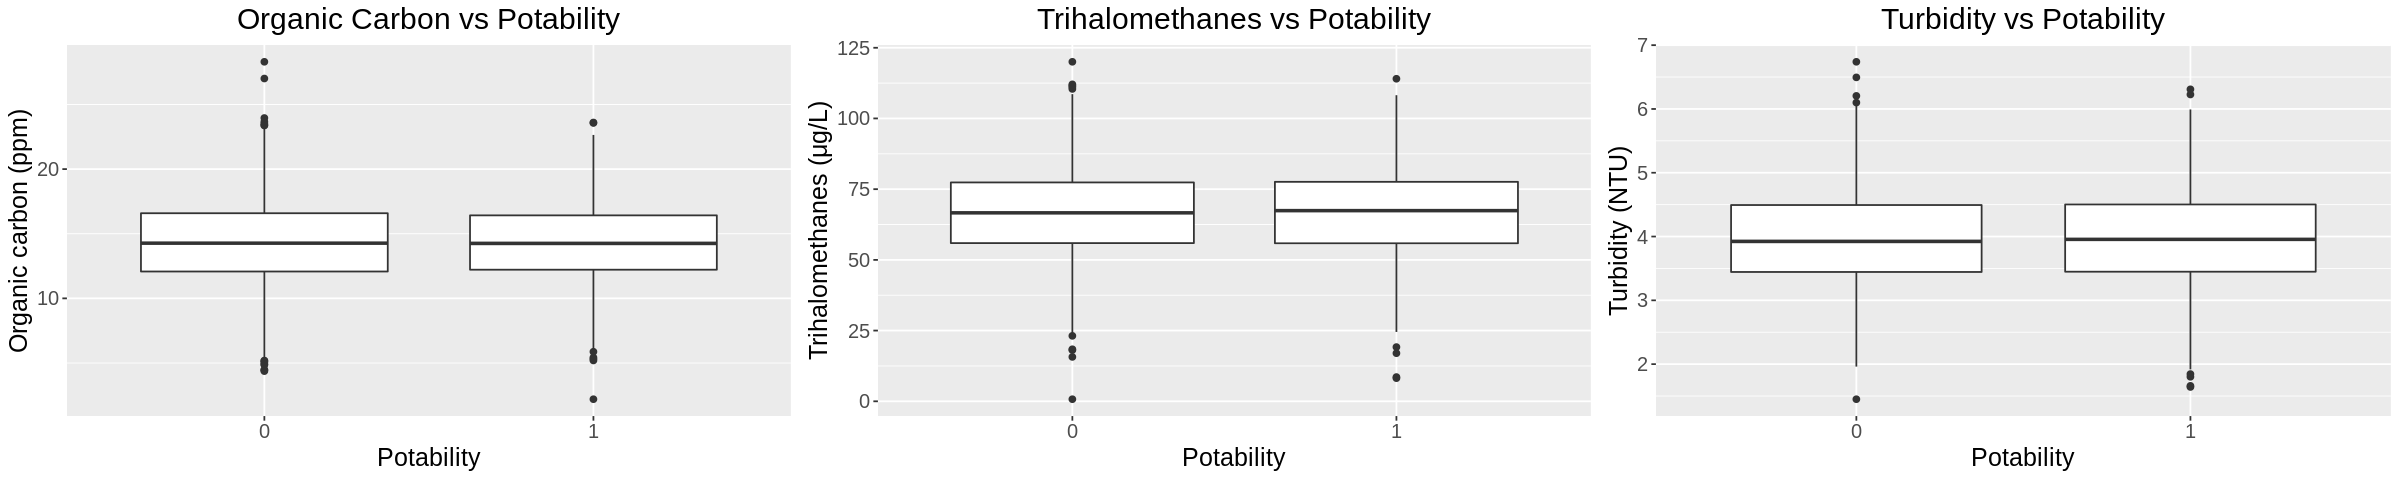

In [68]:
options(repr.plot.width = 20, repr.plot.height = 4)
# suppress warning messages to avoid cluttering
options(warn=-1)

# create boxplot titles 
boxplot_titles <- c("pH vs Potability", "Hardness vs Potability", "Solids vs Potability", "Chloramines vs Potability",
                    "Sulfate vs Potability", "Conductivity vs Potability", "Organic Carbon vs Potability",
                   "Trihalomethanes vs Potability", "Turbidity vs Potability")


# function used to create a boxplot for given predictor vs potability with proper axes and title labels using ggplot
create_boxplot <- function(data_train, cols, units, titles, index) {
    boxplt <- ggplot(data_train, aes_string(x="Potability", y=cols[index])) +
    geom_boxplot()  +
    labs(y = units[index]) + 
    ggtitle(titles[index]) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size=15))
    return(boxplt)
}

# arrange the 9 boxplots in 3x3 format using grid.arrange

for (col in seq(1,9,by=3)) { 
    boxplot1 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col)
    boxplot2 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+1)
    boxplot3 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+2)
    if (col == 1) {
        grid.arrange(boxplot1, boxplot2, boxplot3, ncol=3, 
                     top=textGrob("Figure 3. Box plots showing distribution of each column's observations separated by potability label",gp=gpar(fontsize=20)) )
    } else {
        grid.arrange(boxplot1, boxplot2, boxplot3, ncol=3)
    }
    
}

# enable warnings back
options(warn=0)

From Figure 3, we visualize the distribution of each variable in our dataset with respect to Potability. These box plots provide us with a visual summary of our training data to help us identify the mean values, dispersion of data, and any skewness in our data. Similar to Tables 5, 6 and 7, these box plots confirm that the range of values for each column varies greatly even if we disregard the outliers. Consequently, this tells us that we should definitely scale and center all of our variables, so that columns with large values do not affect the distance calculated in the KNN algorithm much more than the columns with smaller values.

### 5. Creating a correlation matrix for each pair of predictors

To summarize the relationships between variables in the dataset, we create a correlation matrix. It can help us find out pairs of variables with relatively high correlation coefficients, which means that it would be redundant to include both as predictors since they would contribute similarly to the predictions. 

In [20]:
# Create a correlation matrix to show correlation coefficients between variables
water_train_wo_na <- water_train %>%
    select(- Potability) %>%
    drop_na()

cor_matrix <- cor(water_train_wo_na)
cor_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.00000000,0.13858139,-0.09173871,-0.06985335,0.01948714,-0.006091202,0.051537223,0.02209025,-0.041988069
Hardness,0.13858139,1.00000000,-0.01952784,-0.03266186,-0.08371900,-0.015645509,0.028256799,-0.01930436,-0.037263274
Solids,-0.09173871,-0.01952784,1.00000000,-0.04223770,-0.14964309,-0.021377431,0.004279971,-0.04477066,0.002552958
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Organic_carbon,0.05153722,0.02825680,0.004279971,0.01771543,0.027186566,0.005078377,1.00000000,-0.02444775,-0.02409379
Trihalomethanes,0.02209025,-0.01930436,-0.044770655,0.02497506,-0.041669517,-0.008118515,-0.02444775,1.00000000,-0.00536733
Turbidity,-0.04198807,-0.03726327,0.002552958,0.01830168,0.001120304,0.035529838,-0.02409379,-0.00536733,1.00000000


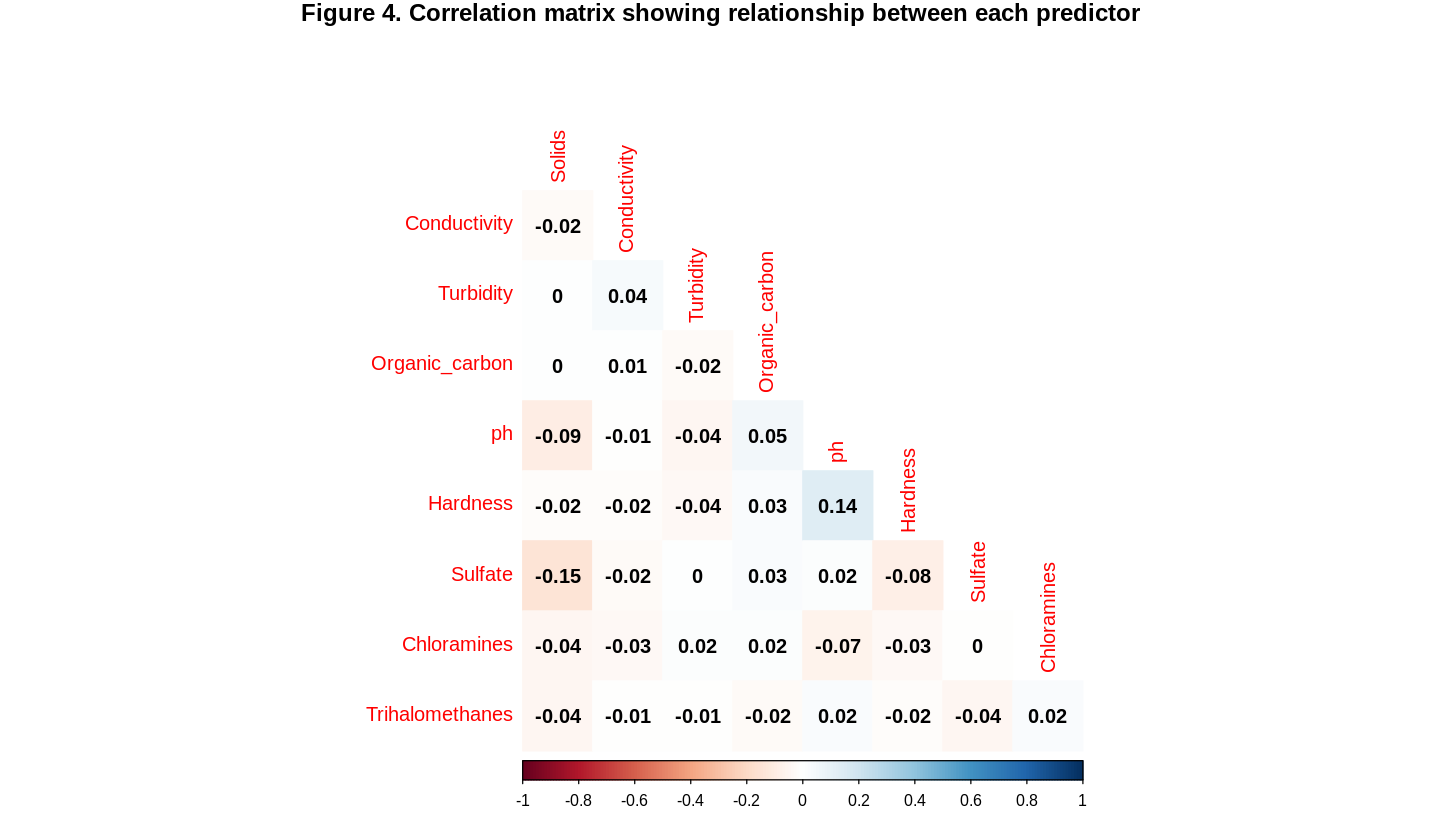

In [22]:
options(repr.plot.width=12, repr.plot.height=7)
# Plot the above correlation matrix

corrplot(cor_matrix, method = 'color', diag = FALSE, 
         type = "lower", order = "hclust", 
         title = 'Figure 4. Correlation matrix showing relationship between each predictor',
         addCoef.col = "black",
         mar = c(0,0,1,0)) 

From Figure 4, we can observe that the correlation coefficient between any two predictors has at most a magnitude of 0.15. This suggests that every possible pair of predictor show a very weak relationship with each other. As a result, it is not very obvious which predictor we should not use to build our model since all of the predictors seem to have different distributions, so an approach to choose the best subset of predictors would be to use forward selection.

### 6. Exploring the relationship between all of our columns

We use the ggpairs function from the GGally package to explore the realtion between all the different columns and our target variable.

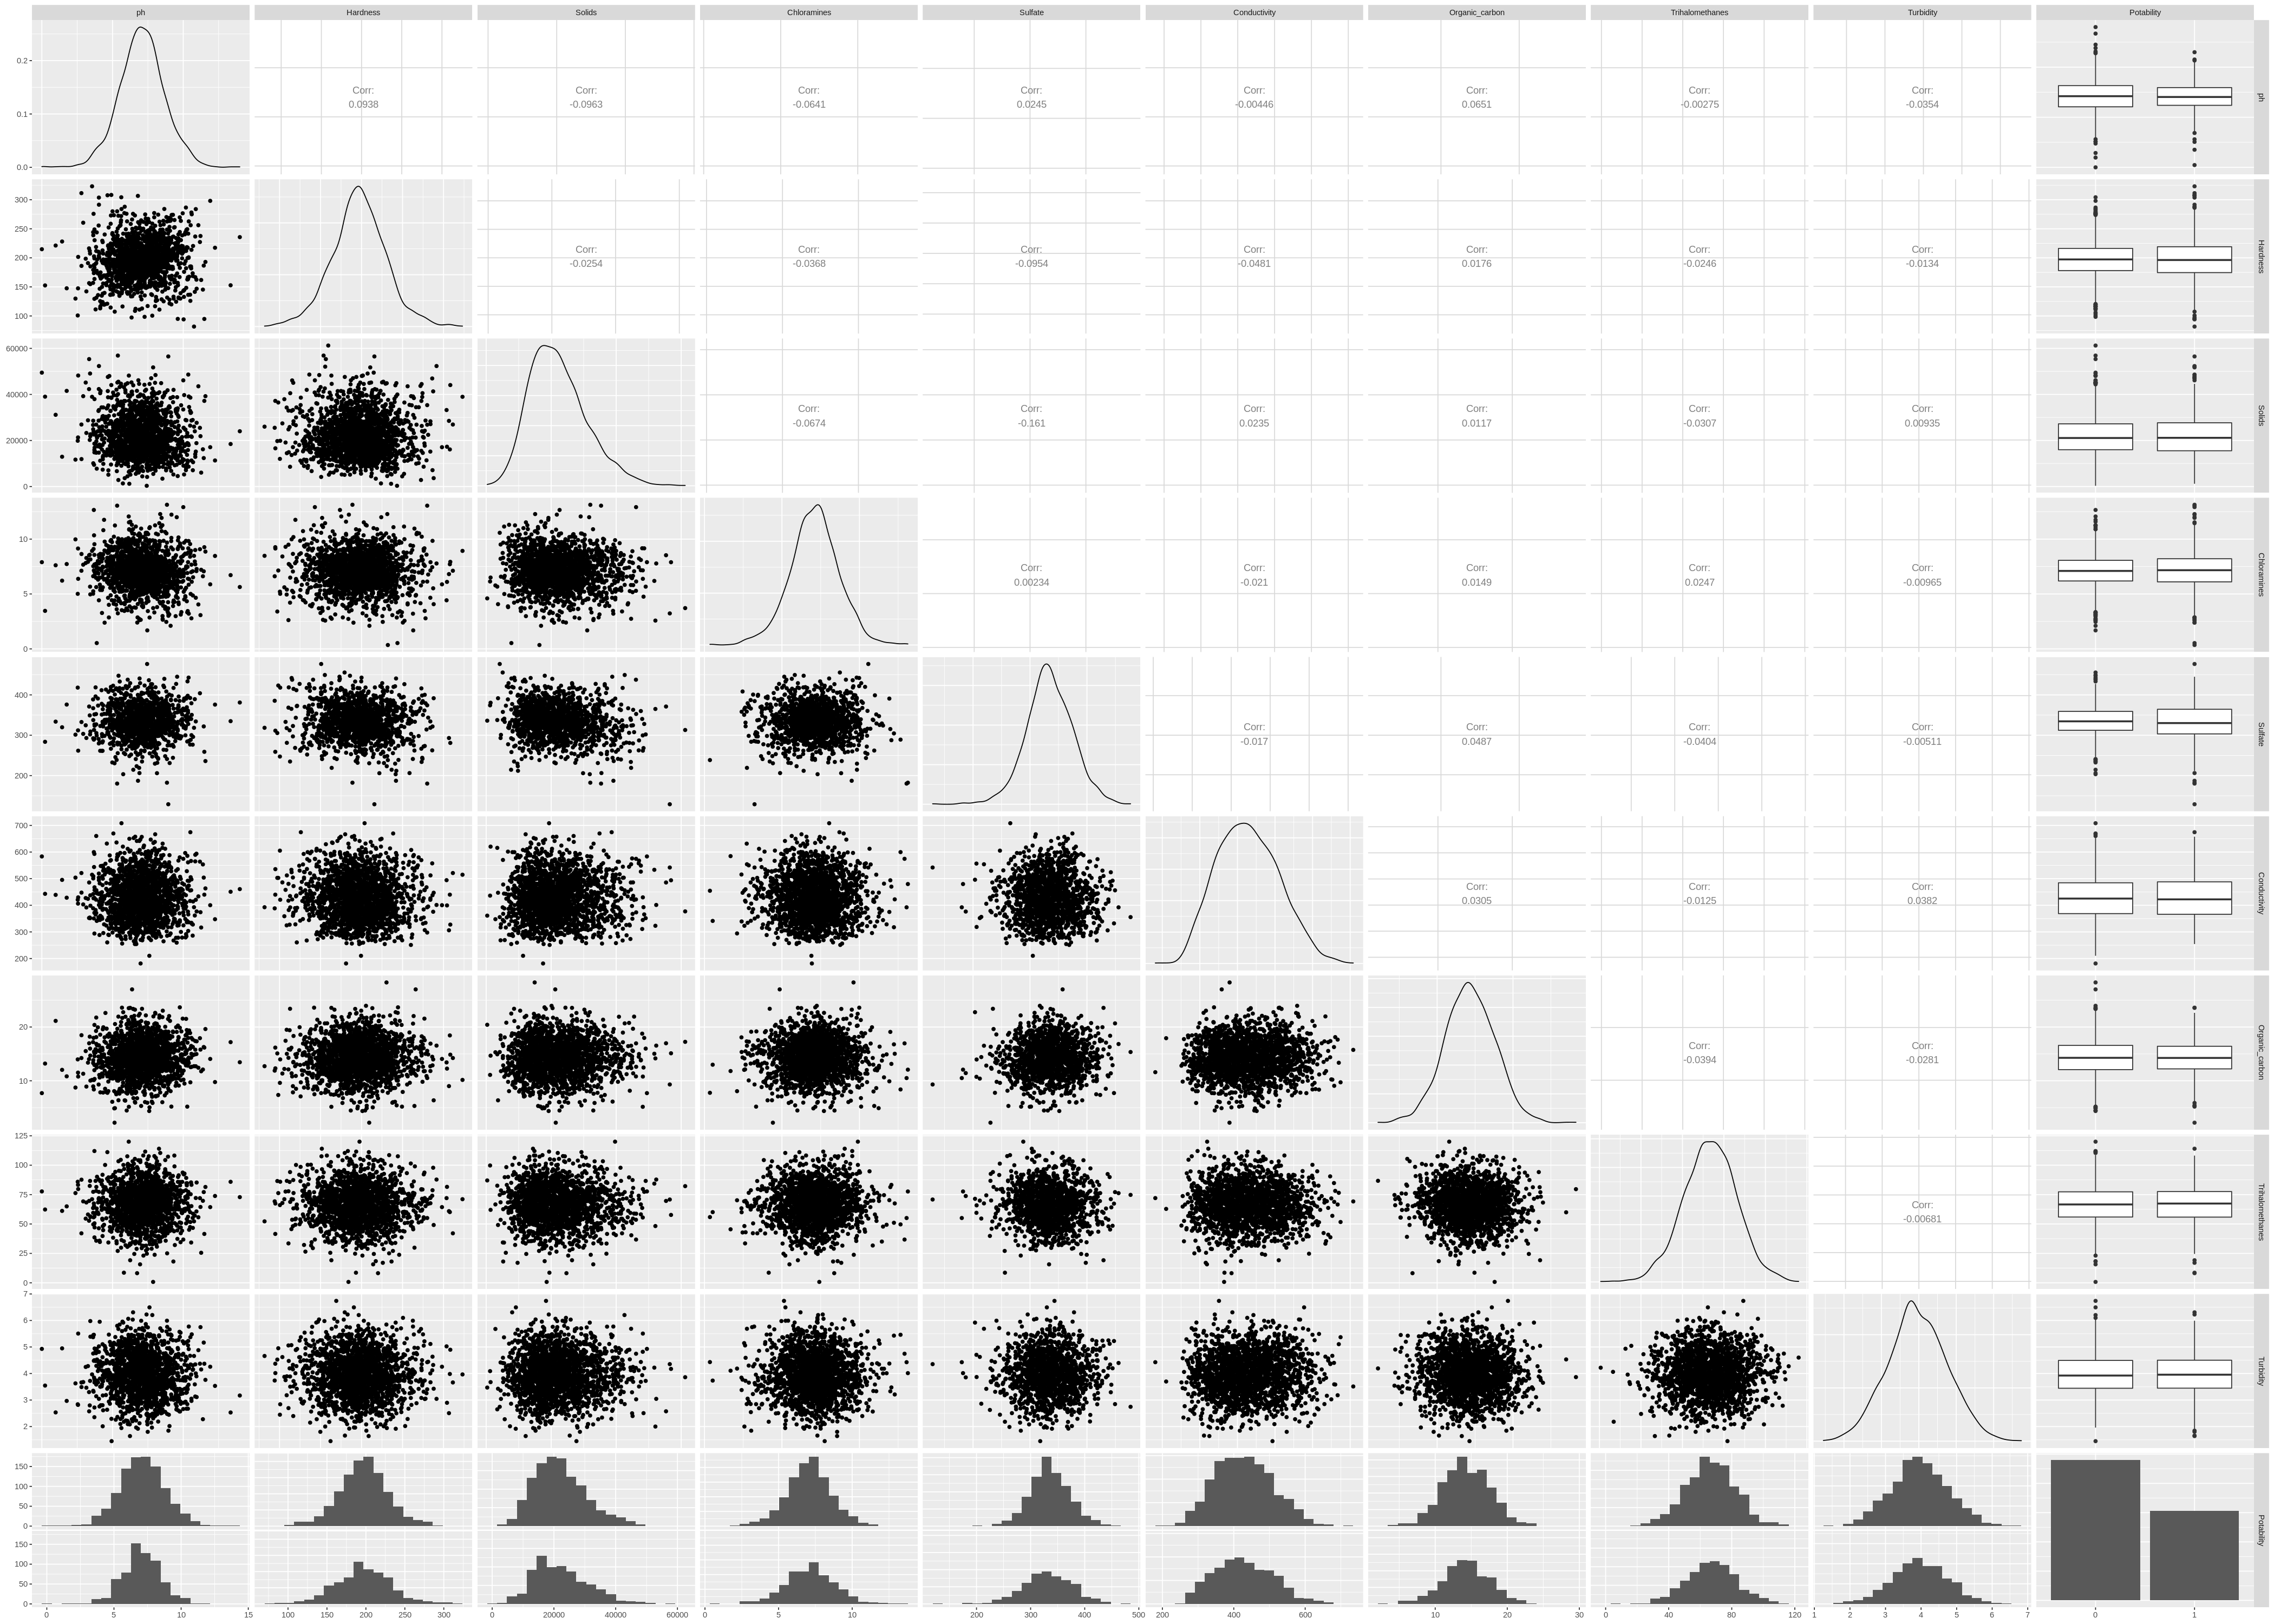

In [66]:
options(repr.plot.width = 35, repr.plot.height = 25)
# suppress warning messages to avoid cluttering
options(warn=-1)

# use ggpairs to plot relationship between all columns
ggpairs_1 <- ggpairs(water_train, 
                     columns = 1:10, lower = list(combo = wrap("facethist", bins = 20)))
ggpairs_1

# enable warnings back
options(warn=0)

add: significane of this plot. The significance of this visualization is that it showcases the frequency and relation between each column and how it affects Potability.[ADD MORE] 

### METHODS OLD (IN CASE NEEDED) 


Next, the best subset of columns will then be analyzed using KNN classification to understand how the predictions are affected by these columns.  Moreover, histograms will be used to visualize the distribution of our predictions of potability, and scatterplots will be used to show the relationship between each predictor used and its effect on potability. Finally, we will discuss and reflect on what our results mean in the context of predicting the potability of water in third world countries.


## METHODS 


## Data preprocessing

1. A large part of our data analysis is based on determining which compound's presence in water affects its potability the most. We will start our data analysis by first filtering out the rows with N/A values. 

In [12]:
#filter N/A values in train set only
water_train <- water_train %>%
            drop_na()
water_train

water_test <- water_test %>%
            drop_na()
water_test

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
10.223862,248.0717,28749.72,7.513408,393.6634,283.6516,13.789695,84.60356,2.672989,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.702547,207.32109,17246.92,7.708117,304.5102,329.2660,16.21730,28.87860,3.442983,1
11.491011,94.81255,37188.83,9.263166,258.9306,439.8936,16.17276,41.55850,4.369264,1
4.668102,193.68174,47580.99,7.166639,359.9486,526.4242,13.89442,66.68769,4.435821,1


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5.893103,239.2695,20526.67,6.349561,341.2564,403.6176,18.96371,63.84632,4.390702,1
8.197353,203.1051,27701.79,6.472914,328.8868,444.6127,14.25088,62.90621,3.361833,1
6.069616,186.6590,26138.78,7.747547,345.7003,415.8870,12.06762,60.41992,3.669712,1


## Forward Selection

2. Filtering out rows would make our training data imbalanced. To account for this imbalance of the potability label, we plan to apply upsampling. We will then standardize the values in our dataset so that we get an accurate model. 

3. We initially decided to use all columns in our dataset because they all describe the quality and presence of chemicals in the water. For instance, the pH can be a useful predictor for us because extremely high or low levels of pH can make water unsafe from the get-go. The presence of compounds such as solids and sulfate can further affect water quality. Columns such as hardness, turbidity, and conductivity can directly tell us about the properties the water holds. **Additionally, the correlation matrix shows that there is no high correlation between any pair of variables, so it is not very obvious which variables are redundant to include. OR However, the ggpair function shows that some predictors have similar correlation coefficients, so it is not very obvious which variables are redundant to include.**  Now, we will use the forward selection method to find a subset of predictors which provides the highest accuracy for our model, and then visualize the results as a line plot. We will then filter out the subset that yields the highest accuracy. 

In [11]:
names <- colnames(water_train %>% select(-Potability))

water_formula <- paste("Potability", "~", paste(names, collapse="+"))
water_formula

[1] "Potability ~ ph+Hardness+Solids+Chloramines+Sulfate+Conductivity+Organic_carbon+Trihalomethanes+Turbidity"

In [12]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 10-fold cross-validation object
water_vfold <- vfold_cv(water_train, v = 10, strata = Potability)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Potability", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        water_recipe <- recipe(as.formula(model_string), 
                                data = water_train) %>%
                          step_upsample(Potability, over_ratio = 1) %>% 
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(water_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = water_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Potability ~ Conductivity,0.5660595
2,Potability ~ Conductivity+Solids,0.5591275
3,Potability ~ Conductivity+Solids+Sulfate,0.5566064
4,Potability ~ Conductivity+Solids+Sulfate+ph,0.5736214
5,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon,0.6214865
6,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness,0.6342427
7,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes,0.6376256
8,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes+Chloramines,0.6299831
9,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes+Chloramines+Turbidity,0.6308974


Now let's model the estimated accuracy versus increasing number of predictors to visualize how the accuracy of our model is changed when we include more predictor variables. 

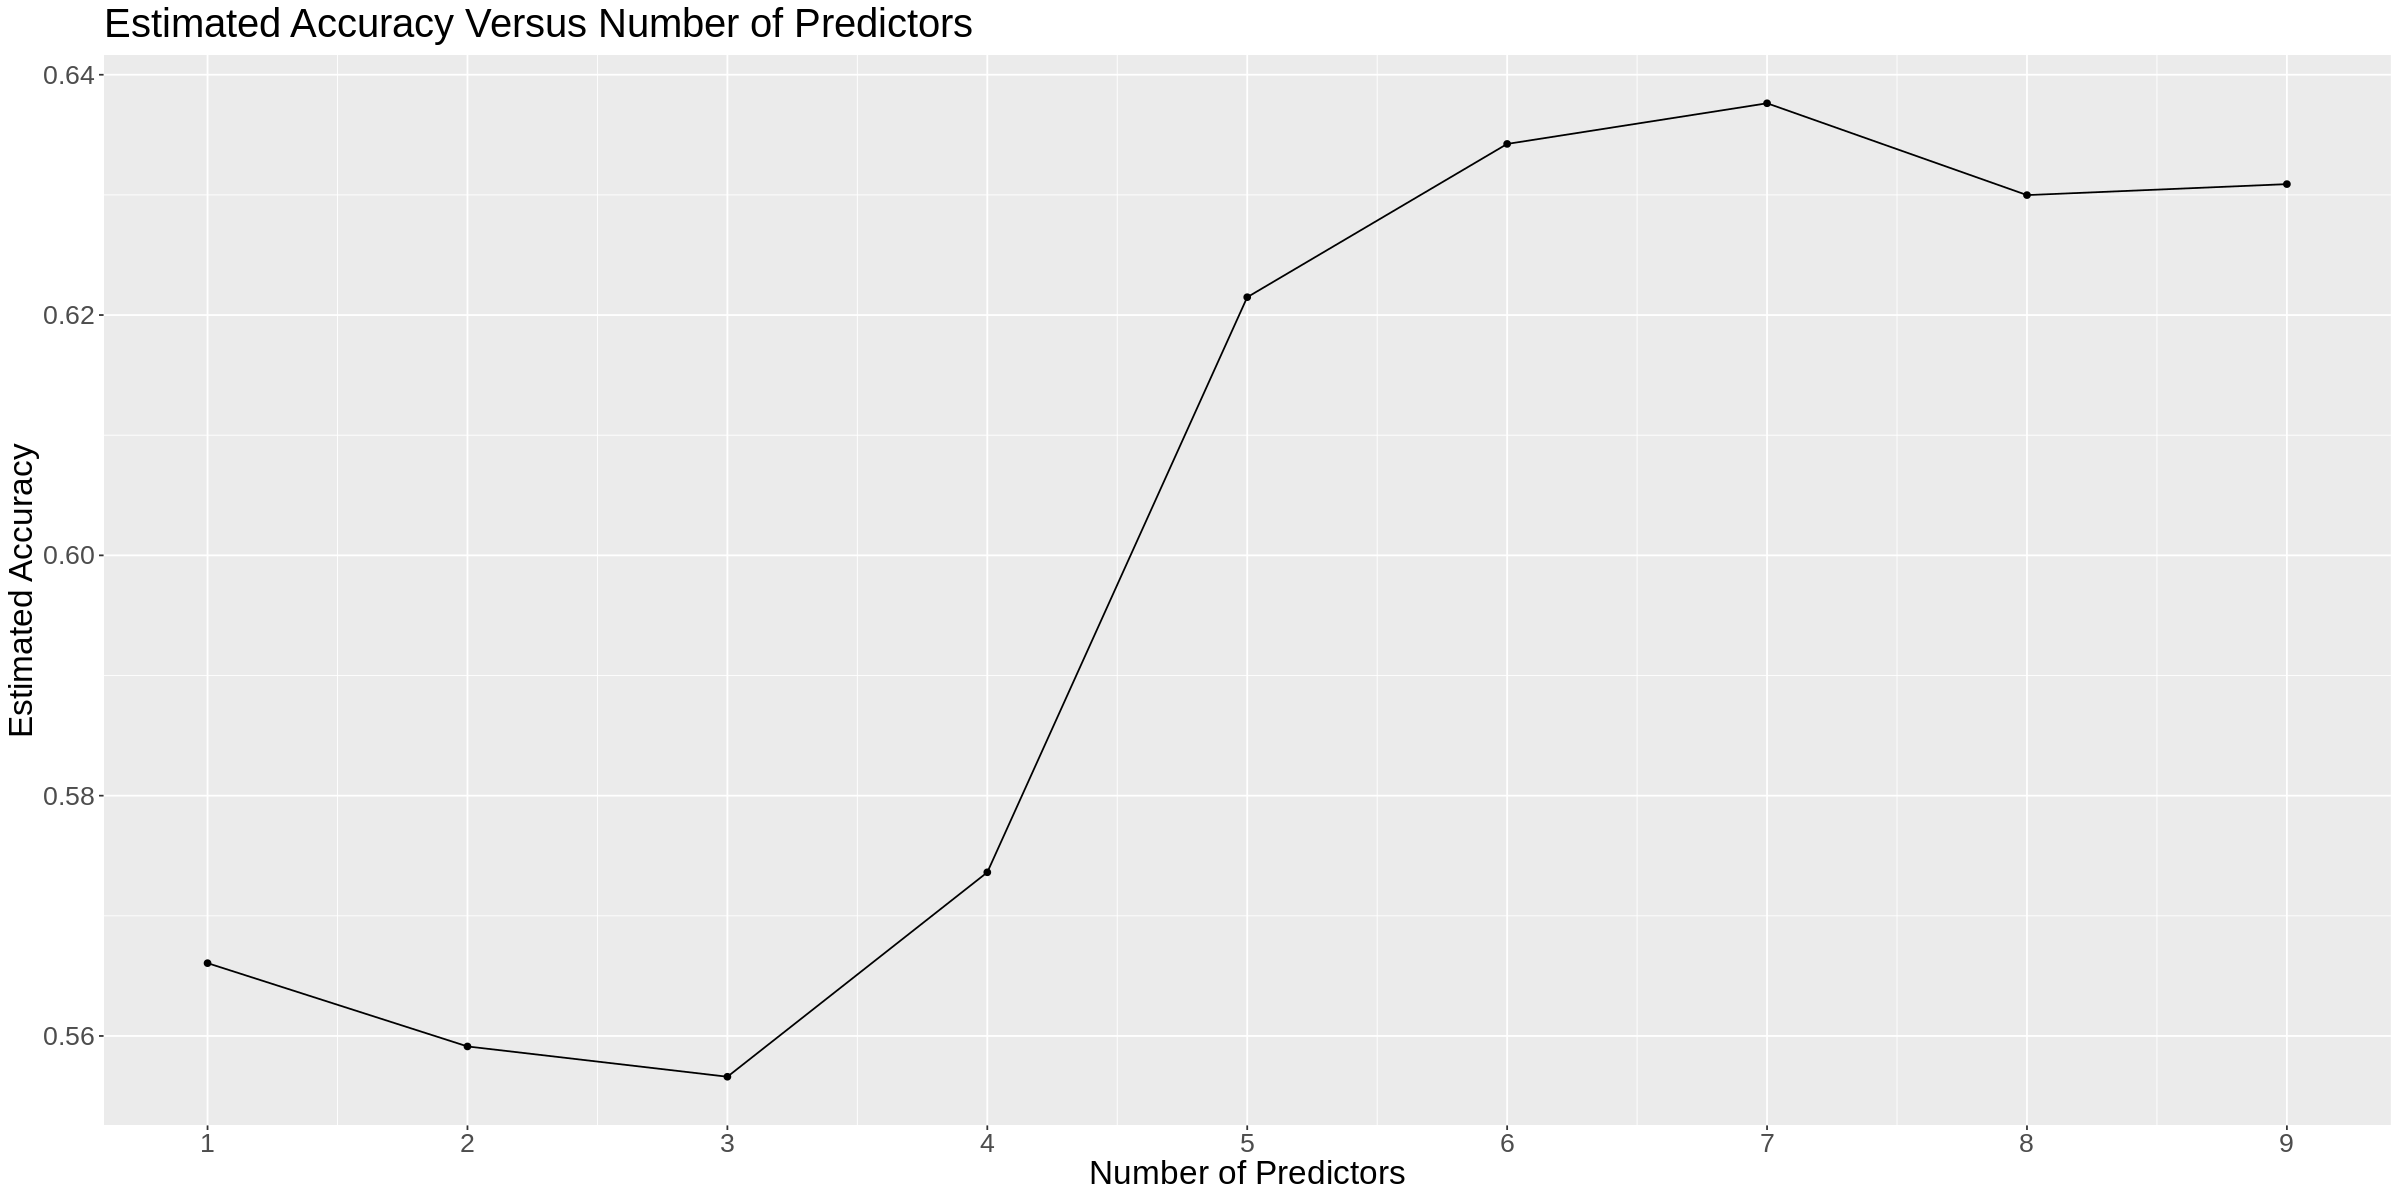

In [24]:
# plot estimated accuracy versus the number of predictors
forward_selection_plot <- accuracies %>%
    ggplot(aes(x = size, y = accuracy)) +
    geom_point() +
    geom_line() +
    labs(x = 'Number of Predictors', y = 'Estimated Accuracy') +
    scale_x_continuous(breaks = seq(1, 9, 1)) +
    ggtitle('Estimated Accuracy vs Number of Predictors') + 
    theme(text = element_text(size = 20))

forward_selection_plot

In [20]:
# show the subset of predictors which has the highest accuracy
best_subset <- accuracies %>%
    filter(accuracy == max(accuracy)) %>%
    slice(1)

best_subset

size,model_string,accuracy
<int>,<chr>,<dbl>
7,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes,0.6376256


According to the results of the forward selection, a subset of predictors including Conductivity, Solids, Sulfate, pH, Organic Carbon, Hardness and Trihalomethanes variables has the highest accuracy (0.6376). This result is interesting because normally, one would think that increasing the types of compounds in water would continously decrease its potability. However, this is not the case. This could be because of similar correlation between some of the predictor variables, which would not increase the accuracy of our model. [ADD MORE REASONS FOR THIS] Therefore, we will only use the predictors specified by forward selection to train the model.

### Building the Model 

4. We will now build our model. To find a good value for K, we will be tuning K using values between [1, 100] with a step size of 10 and using 10-fold cross-validation. To visualize the accuracies of the sets of columns used by the forward selection method, we are going to use a line plot to represent the accuracy vs the number of predictors. We will also plot how the accuracy of our model changes with varying K values using another line plot. 

In [13]:
#build the knn model using training set 

water_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
              set_engine("kknn")%>%
              set_mode("classification")

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by= 10))

#building recipe 
water_recipe <- recipe(Potability ~ Conductivity + Solids + 
                       Sulfate + ph + Organic_carbon + 
                       Hardness + Trihalomethanes, data = water_train)%>%
                step_upsample(Potability, over_ratio = 1) %>% 
                step_scale(all_predictors())%>%
                step_center(all_predictors())

#deciding the number of folds for cross validation 
water_vfold <- vfold_cv(water_train, v= 10, strata = Potability)

water_fit <- workflow()%>%
             add_recipe(water_recipe)%>%
             add_model(water_spec)%>%
             tune_grid(resamples = water_vfold, grid= gridvals)%>%
             collect_metrics() %>%
             filter(.metric == "accuracy")          

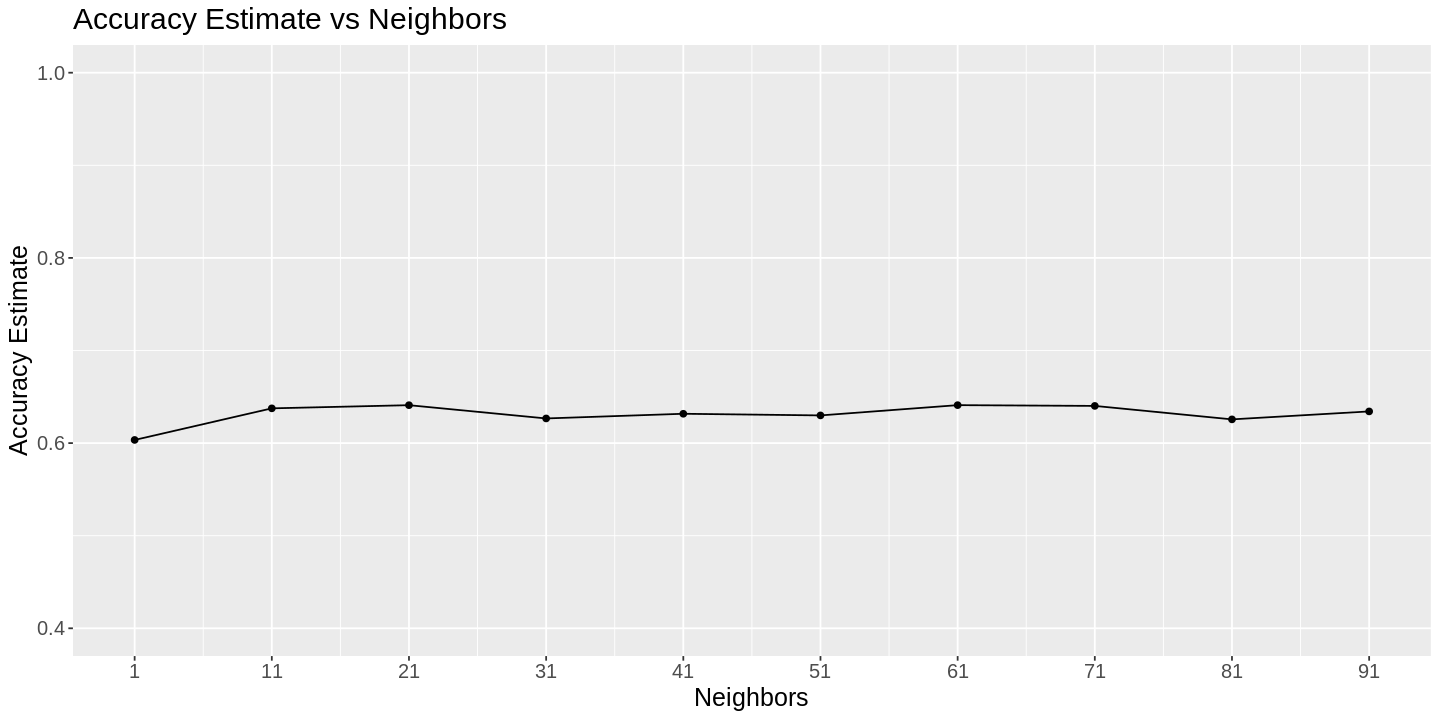

In [14]:
options(repr.plot.width=12, repr.plot.height=6)
water_accuracy_plot <- ggplot(water_fit, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(1, 100, by=10)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
      theme(text = element_text(size = 15)) +
      ggtitle("Accuracy Estimate vs Neighbors")

water_accuracy_plot

In [15]:
options(repr.matrix.max.rows = 10)
arrange(water_fit, desc(mean)) 

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
61,accuracy,binary,0.6409939,10,0.01598389,Model07
21,accuracy,binary,0.6409566,10,0.01360084,Model03
71,accuracy,binary,0.6401682,10,0.01618571,Model08
11,accuracy,binary,0.6375383,10,0.01496189,Model02
91,accuracy,binary,0.6342218,10,0.01636531,Model10
41,accuracy,binary,0.6316789,10,0.01320360,Model05
51,accuracy,binary,0.6299040,10,0.01283111,Model06
31,accuracy,binary,0.6266304,10,0.01067102,Model04
81,accuracy,binary,0.6256304,10,0.01827949,Model09


From the accuracy plot and table above, we can observe that the best k to choose is 21 since it has the highest accuracy and changing this k to its nearby values does not affect the accuracy by a lot. 

5. We now incorporate the best k value (k=21) to build our final model. 

In [16]:
# create knn model with best k
best_spec <- nearest_neighbor(weight_func="rectangular", neighbors=21) %>% 
            set_engine("kknn") %>% 
            set_mode("classification")

# fit best knn model
best_fit <- workflow() %>% 
            add_recipe(water_recipe) %>% 
            add_model(best_spec) %>% 
            fit(water_train)

## Making predictions and visualizing results

6. Using the KNN model built with the best K value, we are going to make predictions [ON WHAT] and compute the accuracy of our model by comparing the predicted labels against the truth labels.

In [17]:
# compute accuracy using test data
predictions <- predict(best_fit, water_test) %>% 
            bind_cols(water_test)

pred_accuracy <- predictions %>% 
            metrics(truth = Potability, estimate =.pred_class) %>% 
            filter(.metric =="accuracy")
pred_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6109785


From the table above, we can observe that the accuracy of our final KNN model is 61.10\%. In our exploratory analysis, we calculated the proportions of each Potability label and we saw that majority label was 0. A baseline accuracy for our model is just predicting the majority label, which would give us an accuracy of approximately 60.99\% (i.e. the proportion of 0 in the training data). The accuracy of our model is only 0.11\% higher than just predicting the most common label, which shows that our model did a poor job predicting the Potability label.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



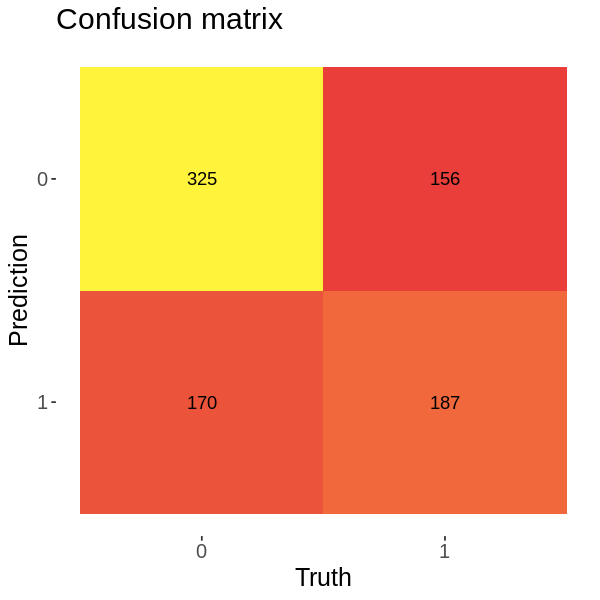

In [18]:
options(repr.plot.width=5, repr.plot.height=5)

conf_m <- predictions %>% conf_mat(truth=Potability, estimate =.pred_class)
autoplot(conf_m, type="heatmap") +
    scale_fill_gradient(low = "#e93e3a", high = "#fff33b") +
    theme(text = element_text(size=15)) +
    ggtitle("Confusion matrix")

From the confusion matrix, we can observe that the number of true positives is 187 and the number of true negatives is 325. In addition, the number of false negatives is 156 and the number of false positives is 170. Ideally, we would want the number of true positives and the true negatives to be high (i.e. the diagonal from top left to bottom right), and the number of false negatives and false positives to be lower than what we currently have (i.e. the diagonal from bottom left to top right). 

We can also compute the recall and precision of our predictions. From the confusion matrix, we have that the recall is $\frac{187}{187+156}=0.5452$ and the precision is $\frac{187}{187+170}=0.5238$. The recall score tells us that we only classified 54.52\% of the truth label 1 correctly and the precision score tells us that 52.38\% of our predictions as label 1 are correct. 

## Discussion

## Outcomes

From the histograms and boxplots, we can expect that the accuracy of the model will not be very high. However, we can also expect some predictors to have stronger predictive power than others, so there should be a subset of predictors that yields the highest accuracy.

Our data analysis will help Dr. Doe understand which chemical compound’s presence in water is affecting water quality the most. The hazards chemicals pose to water can then be studied and effective remedies to prevent water pollution could be put in place. This study can open doors for further research to determine how one chemical compound/pollutant affects water quality as compared to the presence of natural chemicals in the water. Some questions that may be posed are: How can we sanitize/clean this polluted water without extracting its natural minerals? How can we distribute safe water to children throughout the country? And which age group is affected most by contaminated water? 

### Sources: 

* Dataset retrived from: https://www.kaggle.com/adityakadiwal/water-potability
* Mekonnen, M. M., & Hoekstra, A. Y. (2016). Four billion people facing severe water scarcity. Science Advances, 2(2).         https://doi.org/10.1126/sciadv.1500323
* United Nations. (n.d.). Water. United Nations. Retrieved February 24, 2022, from https://www.un.org/en/global-issues/water 
* U.-W. (n.d.). About United Nations Water. UN-Water. https://www.unwater.org/about-unwater/
* https://www.worldvision.ca/stories/clean-water/cholera-waterborne-disease-facts#:~:text=Types%20of%20waterborne%20diseases%20include,can%20lead%20to%20severe%20dehydration
* Water in developing countries. (n.d.). GAC. https://www.international.gc.ca/world-monde/issues_development-enjeux_developpement/environmental_protection-protection_environnement/water-eau.aspx?lang=eng
* The Water Project. (n.d.). The Water Crisis: The Importance of Clean Water to Health. https://thewaterproject.org/why-water/health

